# Projet de régression et classification de qualité de vin

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)


### chargement et aperçu des données:

In [22]:

wine_dataset = pd.read_csv('winequality-red.csv',sep=';')

In [23]:
# Nombre de lignes et colonnes
wine_dataset.shape

(1599, 12)

In [24]:
# aperçu des 5 premières lignes:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Vérifions s'il y a des valeurs non définies:

In [25]:

wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Analyse statistique de nos données:

In [26]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Distribution par qualité:

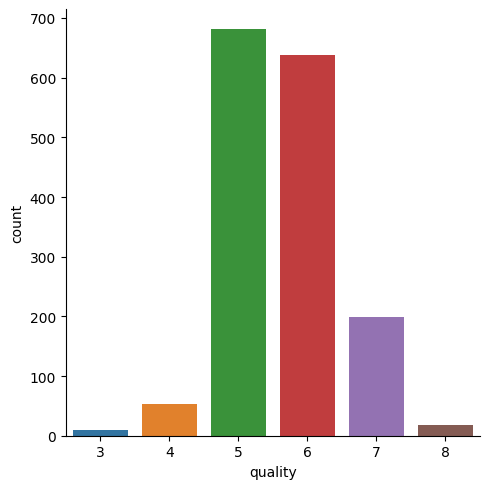

In [27]:
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

On remarques de grandes inégalités dans la distribution des classes. Ceci sera à prendre en compte dans le choix des métriques d'évaluation de nos modèles

## Analyse par colonne:

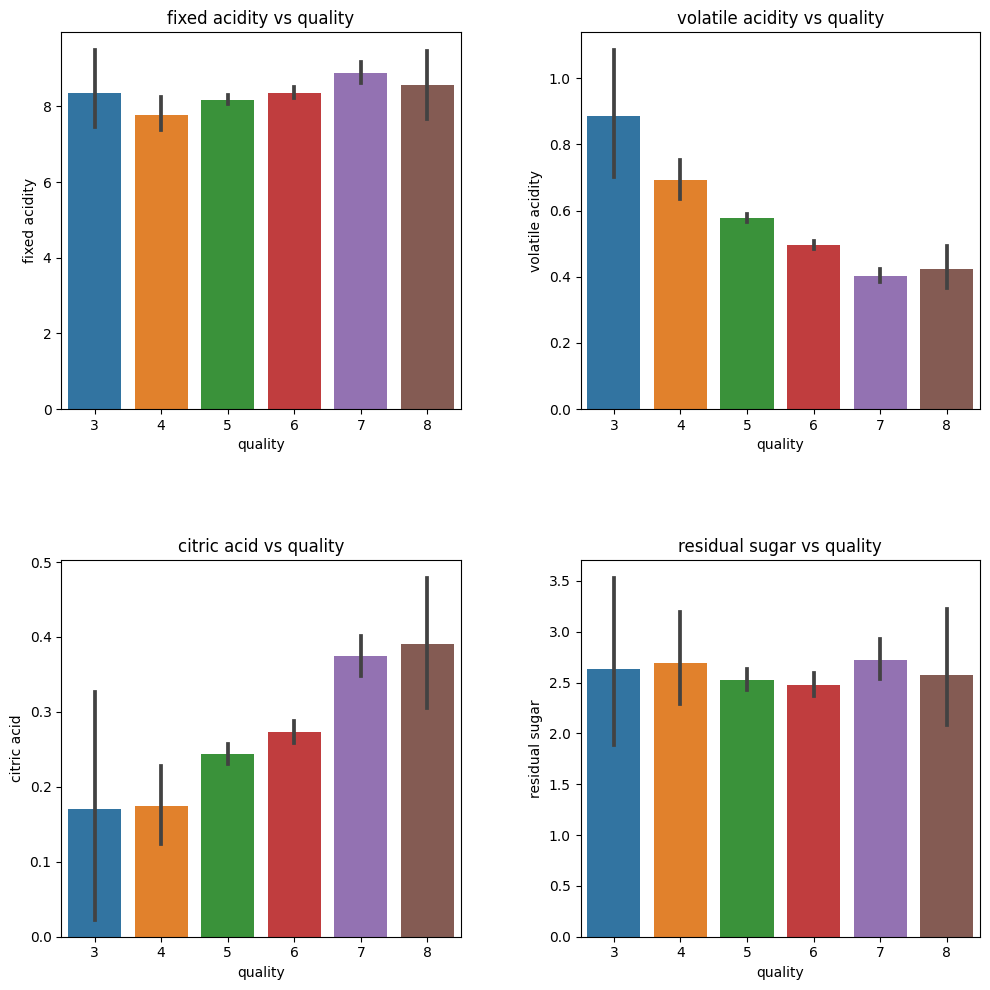

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# notre variable abscisse:
x = 'quality'

# list des colonnes à analyser
y_list = wine_dataset.columns[:4]

# Creation de la grille 2x2 des plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

# Iteration sur les variables:
for i, y in enumerate(y_list):
    sns.barplot(x=x, y=y, data=wine_dataset, ax=axs[i])
    axs[i].set_title('{} vs {}'.format(y, x))

# Adjust the layout and spacing of the subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Affichage
plt.show()


Ces graphiques montrent la relation entre la qualité du vin (variable quality sur l'axe horizontal) et chacune des quatre premières variables du jeu de données (variables `volatile acidity`, ``fixed acidity``, ``citric acid`` et ``residual sugar`` sur l'axe vertical). Chaque graphique est un graphique en barres qui montre la moyenne de chaque variable pour chaque niveau de qualité. Ces graphiques permettent de visualiser comment chaque variable affecte la qualité du vin et si elles ont un impact positif ou négatif sur la qualité.

### Pour aller plus loin, affichons les coefficients de corrélation entre variables avec un heatmap:

<AxesSubplot: >

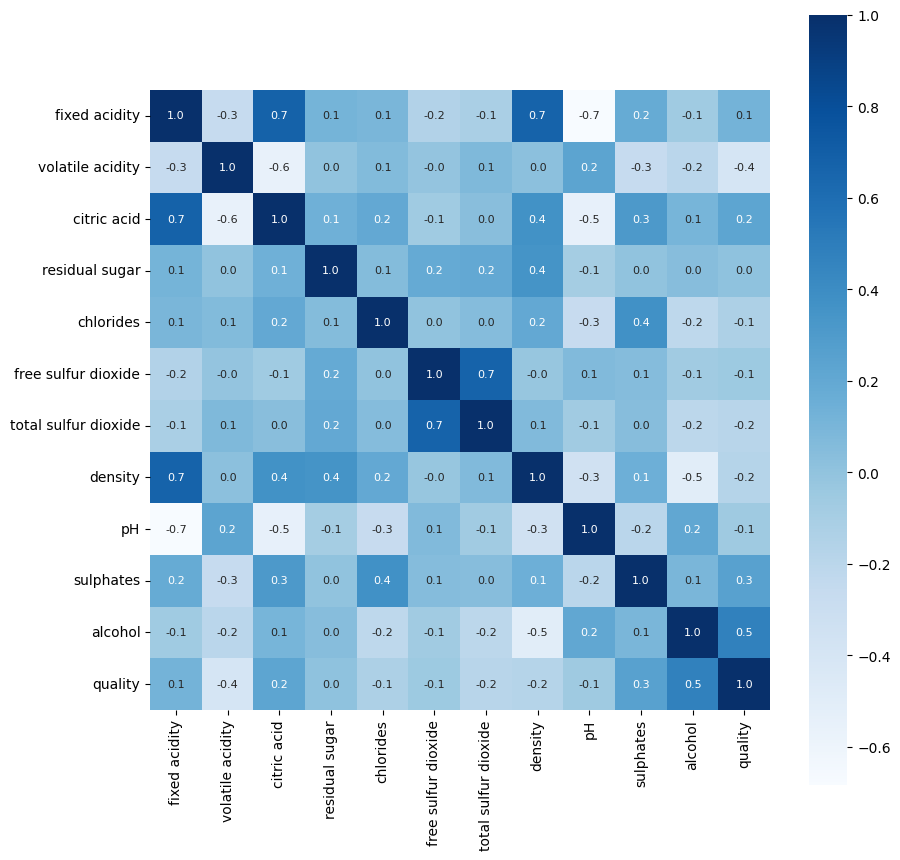

In [29]:
correlation = wine_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

## Data Preprocessing

In [30]:
# separation data and Label
X = wine_dataset.drop('quality',axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Division en deux classes
On va splitter le dataset en deux catégories à partir de la qualité: Bon(1) et Mauvais(0)
Cela aura également pour effet de supprimer les différences entre les cardinalités des classes:

In [31]:
Y = wine_dataset['quality']
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

### Normalisation

In [32]:
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Standardiser X_train
X_train_scaled = scaler.fit_transform(X_train)

# Standardiser X_test using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Affichage moyenne et ecart-type de X_train
print('Moyenne training:', X_train_scaled.mean(axis=0))
print()
print('Ecart type training:', X_train_scaled.std(axis=0))
print()
# Affichage moyenne et ecart-type de  X_test
print('Moyenne test:', X_test_scaled.mean(axis=0))
print()
print('Ecart type test', X_test_scaled.std(axis=0))


Moyenne training: [-1.11109106e-16  4.11798126e-16  1.26386609e-16  1.52775021e-17
 -1.04164787e-16 -7.63875107e-17 -7.56930788e-17  2.55939827e-14
 -1.35830883e-15  4.15270285e-16  4.77769158e-16]

Ecart type training: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Moyenne test: [-0.01175055 -0.07635958 -0.03823836 -0.05802946 -0.09945134 -0.00055896
 -0.02873498 -0.0735317  -0.01741397 -0.05366908  0.02318761]

Ecart type test [1.04825878 0.99202249 0.98315693 0.90535833 0.73761962 1.06953655
 0.99296586 1.08025655 1.01224123 0.84316158 1.06032677]


# Analyse multi-classes

Dans cette partie, on travaille avec ce dataset tel qu'il est, sans regrouper la classe prédite en deux valeurs

# Régression linéaire multi-classe

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression object
reg = LinearRegression()

# Train the model on the standardized training data
reg.fit(X_train_scaled, Y_train)

# Predict the quality values for the standardized test data
Y_pred = reg.predict(X_test_scaled)

# Compute the mean squared error and R2 score of the predictions
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the mean squared error and R2 score of the predictions
print('Mean squared error:', mse)
print('R2 score:', r2)


Mean squared error: 0.39002514396395493
R2 score: 0.4031803412796219


## Interprétations

L'erreur quadratique moyenne (MSE) de 0,39 suggère que la différence moyenne au carré entre les prédictions de qualité du vin et les valeurs réelles est de 0,39.

Le score R2 de 0,40 suggère que le modèle de régression linéaire explique 40% de la variabilité des données de qualité du vin. Le score R2 varie de 0 à 1, 1 indiquant un ajustement parfait du modèle aux données. Par conséquent, un score R2 de 0,40 indique que le modèle est capable d'expliquer 40% de la variance de la variable cible, tandis que les 60% restants de la variance ne sont toujours pas expliqués par le modèle.

Cette faible performance du modèle montre que la relation entre ces variables et la sortie ont une composante non linéaire non négligeable



In [34]:
# Get the coefficients (slopes) and intercept of the model
coefficients = reg.coef_
intercept = reg.intercept_

# Print the coefficients and intercept
print('Coefficients:', coefficients)
print('Intercept:', intercept)


Coefficients: [ 0.03978916 -0.17943891 -0.02751248  0.00942128 -0.08908432  0.05801491
 -0.12000836 -0.01920444 -0.06061037  0.14681503  0.2966275 ]
Intercept: 5.623924941360438


acidité fixe: La valeur de coefficient de 0,0398 suggère que pour chaque augmentation d'une unité de l'acidité fixe, on s'attend à ce que la qualité du vin augmente d'environ 0,04 points, en maintenant toutes les autres variables constantes.

acidité volatile: La valeur de coefficient de -0,1794 suggère que pour chaque augmentation d'une unité de l'acidité volatile, on s'attend à ce que la qualité du vin diminue d'environ 0,18 points, en maintenant toutes les autres variables constantes.

acide citrique: La valeur de coefficient de -0,0275 suggère que pour chaque augmentation d'une unité d'acide citrique, on s'attend à ce que la qualité du vin diminue d'environ 0,03 points, en maintenant toutes les autres variables constantes. 

Et ainsi de suite...

## Modèle Arbre de décision multi-classe

On va utiliser un grid search pour tester plusieurs modèles en même temps et choisir celui ave sles meilleurs paramètres ('max_depth', 'min_samples_split','min_samples_leaf').
On fera un plot qui montre l'influence des hyperparamètres sur le score final du modèle, ainsi que de l'arbre optimal obtenu.


Meilleurs hyperparamètres:
{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
Rapport du classifieur arbre de décision:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       141
           1       0.76      0.72      0.74       179

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.72      0.72      0.72       320



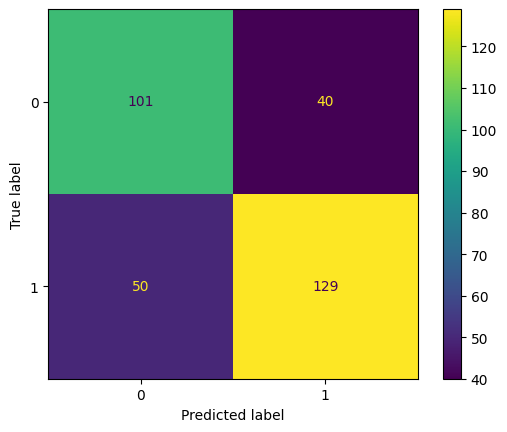

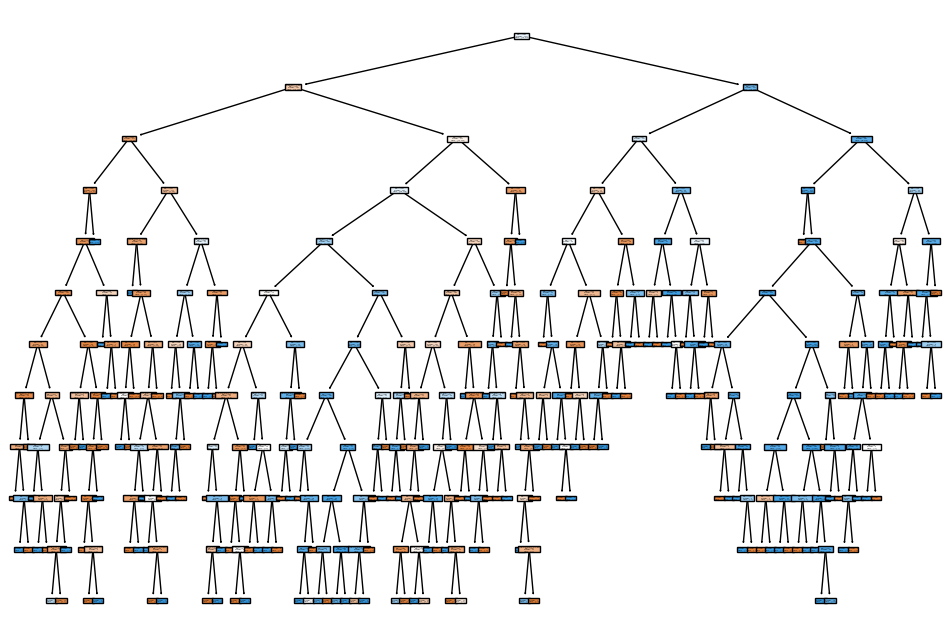

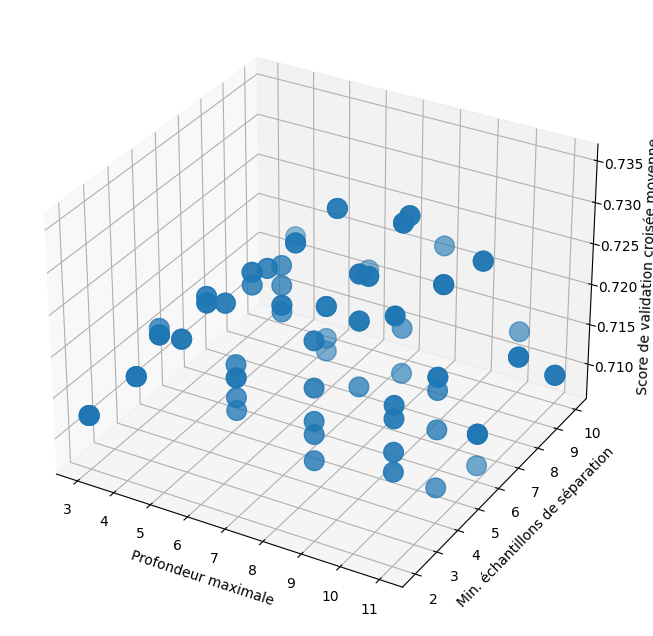

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt

# Définir la grille de paramètres de l'arbre de décision
param_grid = {'max_depth': [3, 5, 7, 9, 11],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

# Créer un objet classifieur arbre de décision
dt = DecisionTreeClassifier(random_state=42)

# Créer un objet GridSearchCV avec le classifieur arbre de décision et la grille de paramètres
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Adapter l'objet GridSearchCV aux données d'entraînement
dt_grid.fit(X_train_scaled, Y_train)

# Obtenir les résultats de la grille de paramètres
results = dt_grid.cv_results_

# Extraire les scores de validation croisée moyens pour chaque combinaison de paramètres
mean_scores = results['mean_test_score']

# Créer une liste de dictionnaires pour stocker les scores de validation croisée pour chaque combinaison de paramètres
params_scores = []

# Parcourir chaque combinaison de paramètres
for i in range(len(mean_scores)):
    # Obtenir les paramètres de la combinaison
    params = results['params'][i]
    # Ajouter les paramètres et le score moyen à la liste
    params_scores.append({'params': params, 'score': mean_scores[i]})

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:")
print(dt_grid.best_params_)

# Évaluer le meilleur classifieur arbre de décision en utilisant les données de test
Y_pred_dt = dt_grid.best_estimator_.predict(X_test_scaled)
dt_report = classification_report(Y_test, Y_pred_dt)

# Afficher le rapport de classification du classifieur arbre de décision
print('Rapport du classifieur arbre de décision:')
print(dt_report)

# Afficher la matrice de confusion du classifieur arbre de décision
plot_confusion_matrix(dt_grid.best_estimator_, X_test_scaled, Y_test)

# Afficher l'arbre de décision avec les paramètres par défaut
plt.figure(figsize=(12,8))
plot_tree(dt_grid.best_estimator_, filled=True, feature_names=X.columns)
plt.show()


# Create meshgrid arrays for the x, y, and z axes
depths, min_samples_splits, min_samples_leafs = np.meshgrid(param_grid['max_depth'], param_grid['min_samples_split'], param_grid['min_samples_leaf'], indexing='ij')
depths = depths.ravel()
min_samples_splits = min_samples_splits.ravel()
min_samples_leafs = min_samples_leafs.ravel()

# Créer un graphique en 3D pour les scores de validation croisée
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(depths, min_samples_splits, mean_scores, s=200)
ax.set_xlabel('Profondeur maximale')
ax.set_ylabel('Min. échantillons de séparation')
ax.set_zlabel('Score de validation croisée moyenne')
plt.show()


## Analyse et interprétations des résultats:

On voit d'emblée que les classes sous-représentées ne sont pas bien classifiées, ce qui n'est pas étonnant. A partir du score F1 et de la matrice de confusion, on voit que les classes 5 6 et 7 sont les mieux classifiées malgré une précision d'environ 50%. Malgré ces faibles performances, ce modèle reste meilleur que celui du modèle linéaire.

## Modèle SVM multi-classe

On va utiliser un grid search pour tester plusieurs modèles en même temps et choisir le meilleur au final:

Rapport de classification :
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       141
           1       0.80      0.77      0.78       179

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



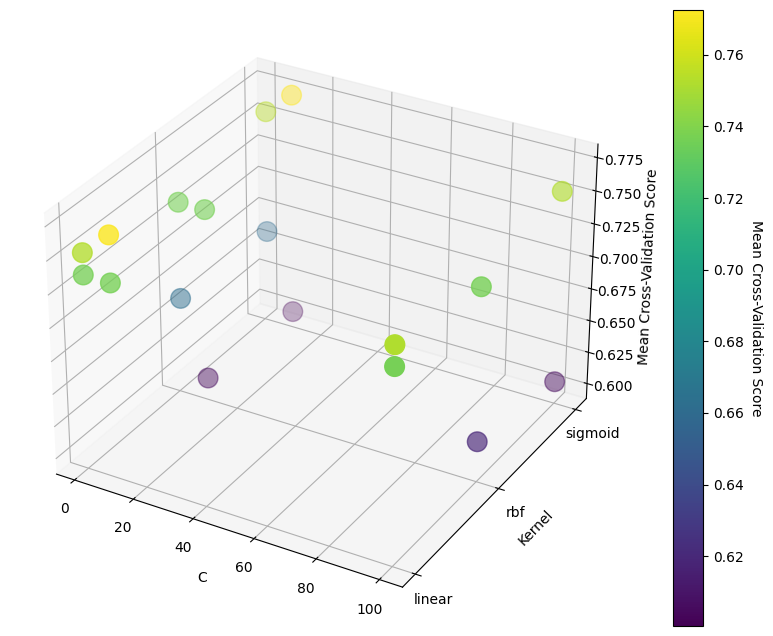

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Créer un objet SVC
svc = SVC()

# Définir la grille d'hyperparamètres
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

# Créer un objet GridSearchCV avec SVC et la grille d'hyperparamètres
grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)

# Entraîner le modèle sur les données d'entraînement standardisées
grid_search.fit(X_train_scaled, Y_train)

# Obtenir le meilleur modèle à partir de la recherche en grille
best_model = grid_search.best_estimator_

# Prédire les valeurs de qualité pour les données de test standardisées
Y_pred = best_model.predict(X_test_scaled)

# Calculer le rapport de classification des prédictions
report = classification_report(Y_test, Y_pred)

# Afficher le rapport de classification des prédictions
print('Rapport de classification :')
print(report)


# Obtenir les résultats de la recherche en grille
results = grid_search.cv_results_

# Extraire les scores de validation croisée moyens pour chaque combinaison de paramètres
mean_scores = results['mean_test_score']

# Create meshgrid arrays for the x, y, and z axes
Cs, kernels, gammas = np.meshgrid(param_grid['C'], param_grid['kernel'], param_grid['gamma'], indexing='ij')
Cs = Cs.ravel()
kernels = kernels.ravel()
gammas = gammas.ravel()

# Map the kernel names to numerical values for plotting
kernel_mapping = {'linear': 1, 'rbf': 2, 'sigmoid': 3}
kernels_numerical = np.array([kernel_mapping[k] for k in kernels])

# Create a 3D plot for the cross-validation scores
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(Cs, kernels_numerical, mean_scores, s=200, c=mean_scores, cmap='viridis')
ax.set_xlabel('C')
ax.set_ylabel('Kernel')
ax.set_zlabel('Mean Cross-Validation Score')
ax.set_yticks(list(kernel_mapping.values()))
ax.set_yticklabels(list(kernel_mapping.keys()))

# Add a colorbar to the plot
cbar = plt.colorbar(sc, ax=ax)
cbar.ax.set_ylabel('Mean Cross-Validation Score', rotation=-90, va="bottom")

plt.show()



## Model Random Forest multi-classe:

### On va ici utiliser une grille de paramètres en plus d'une validation croisée:
On fera le plot des performances du modèle en fonction des hyper paramètres

Meilleurs hyperparamètres:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Rapport de classification pour le pli 1:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       120
           1       0.83      0.84      0.83       136

    accuracy                           0.82       256
   macro avg       0.82      0.82      0.82       256
weighted avg       0.82      0.82      0.82       256

------------------------------------------------------------
Rapport de classification pour le pli 2:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       121
           1       0.83      0.84      0.84       135

    accuracy                           0.83       256
   macro avg       0.83      0.83      0.83       256
weighted avg       0.83      0.83      0.83       256

------------------------------------------------------------
Rapport de classification pou

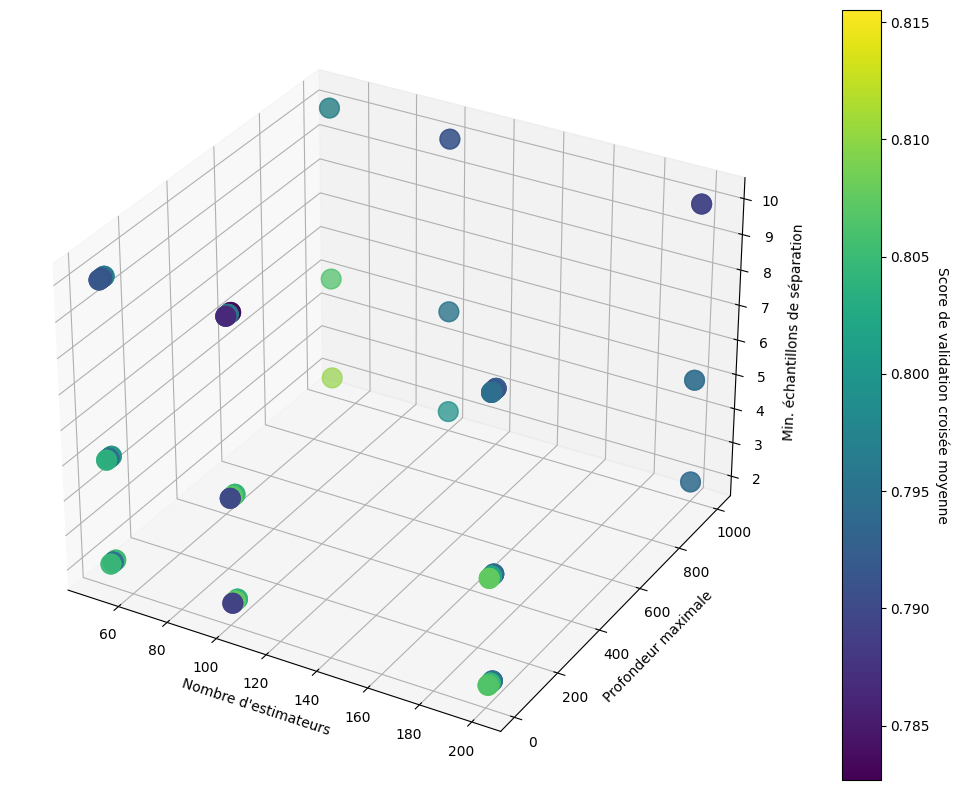

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

# Créer un objet RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Définir la grille des hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Créer un objet GridSearchCV avec RandomForestClassifier et la grille d'hyperparamètres
grid_search = GridSearchCV(rfc, param_grid, scoring='accuracy', cv=5)

# Entraîner le modèle sur les données d'entraînement standardisées
grid_search.fit(X_train_scaled, Y_train)

# Obtenir le meilleur modèle de la recherche par grille
best_model = grid_search.best_estimator_

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:")
print(grid_search.best_params_)

# Créer un objet StratifiedKFold avec 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser le compteur de pli
fold = 1

# Itérer à travers les plis Stratified K-fold
for train_index, test_index in skf.split(X_train_scaled, Y_train):
    # Séparer les données en ensembles d'entraînement et de validation pour le pli courant
    X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    Y_train_fold, Y_test_fold = Y_train.iloc[train_index], Y_train.iloc[test_index]

    # Entraîner le meilleur modèle sur les données d'entraînement actuelles du pli courant
    best_model.fit(X_train_fold, Y_train_fold)

    # Prédire les valeurs de qualité pour les données de validation actuelles du pli courant
    Y_pred_fold = best_model.predict(X_test_fold)

    # Calculer le rapport de classification pour le pli courant
    report = classification_report(Y_test_fold, Y_pred_fold)

    # Afficher le rapport de classification pour le pli courant
    print(f'Rapport de classification pour le pli {fold}:')
    print(report)
    print('-' * 60)

    # Incrémenter le compteur de pli
    fold += 1


# Obtenir les résultats de la recherche en grille
results = grid_search.cv_results_

# Extraire les scores de validation croisée moyens pour chaque combinaison de paramètres
mean_scores = results['mean_test_score']

# Create meshgrid arrays for the x, y, and z axes
n_estimators, max_depths, min_samples_splits, min_samples_leafs = np.meshgrid(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['min_samples_split'],
    param_grid['min_samples_leaf'],
    indexing='ij'
)

n_estimators = n_estimators.ravel()
max_depths = max_depths.ravel()
min_samples_splits = min_samples_splits.ravel()
min_samples_leafs = min_samples_leafs.ravel()

# Plot the 4D scatter plot for the cross-validation scores
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Replace None in max_depths with a large number for plotting purposes
max_depths_plot = np.where(max_depths == None, 999, max_depths)

sc = ax.scatter(n_estimators, max_depths_plot, min_samples_splits, c=mean_scores, s=200, cmap='viridis', depthshade=True)

ax.set_xlabel('Nombre d\'estimateurs')
ax.set_ylabel('Profondeur maximale')
ax.set_zlabel('Min. échantillons de séparation')

# Add a colorbar to the plot
cbar = plt.colorbar(sc, ax=ax)
cbar.ax.set_ylabel('Score de validation croisée moyenne', rotation=-90, va="bottom")

plt.show()

## Analyse et interprétations des résultats:

On voit toujours que les classes sous-représentées ne sont pas bien classifiées, ce qui n'est pas étonnant. 
A partir du score F1, la classe 5 est ma mieux classifiée suivie de la classe 6 et puis la 7 comme pour la méthode SVM
Le modèle Random Forest obtenu reste le meilleur parmi les trois que l'on a testées jusque là.

# Classification binaire

On va `binariser` la sortie en `0 = mauvaise qualité`  et  `1 = bonne qualité`

moyenne training: [-1.11109106e-16  4.11798126e-16  1.26386609e-16  1.52775021e-17
 -1.04164787e-16 -7.63875107e-17 -7.56930788e-17  2.55939827e-14
 -1.35830883e-15  4.15270285e-16  4.77769158e-16]

ecart type training: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

moyenne test: [-0.01175055 -0.07635958 -0.03823836 -0.05802946 -0.09945134 -0.00055896
 -0.02873498 -0.0735317  -0.01741397 -0.05366908  0.02318761]

ecart type test [1.04825878 0.99202249 0.98315693 0.90535833 0.73761962 1.06953655
 0.99296586 1.08025655 1.01224123 0.84316158 1.06032677]


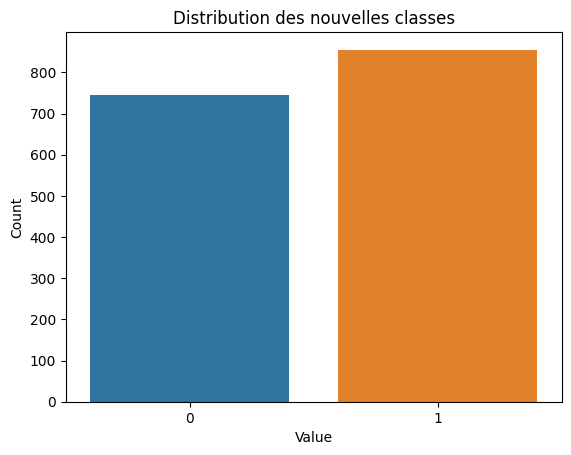

In [55]:
X = wine_dataset.drop('quality',axis=1)
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Standardiser X_train
X_train_scaled = scaler.fit_transform(X_train)

# Standardiser X_test using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Affichage moyenne et ecart-type de X_train
print('moyenne training:', X_train_scaled.mean(axis=0))
print()
print('ecart type training:', X_train_scaled.std(axis=0))
print()
# Affichage moyenne et ecart-type de  X_test
print('moyenne test:', X_test_scaled.mean(axis=0))
print()
print('ecart type test', X_test_scaled.std(axis=0))
# Create a bar plot of the counts
sns.countplot(x=Y)

# Add a title and axis labels to the plot
plt.title('Distribution des nouvelles classes')
plt.xlabel('Value')
plt.ylabel('Count')

# Display the plot
plt.show()

## Modèle Arbre de décision binaire

On va utiliser un grid search pour tester plusieurs modèles en même temps et choisir celui ave sles meilleurs paramètres ('max_depth', 'min_samples_split','min_samples_leaf').
On fera un plot qui montre l'influence des hyperparamètres sur le score final du modèle, ainsi que de l'arbre optimal obtenu.

Meilleurs hyperparamètres:
{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
Rapport du classifieur arbre de décision:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       141
           1       0.76      0.72      0.74       179

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.72      0.72      0.72       320



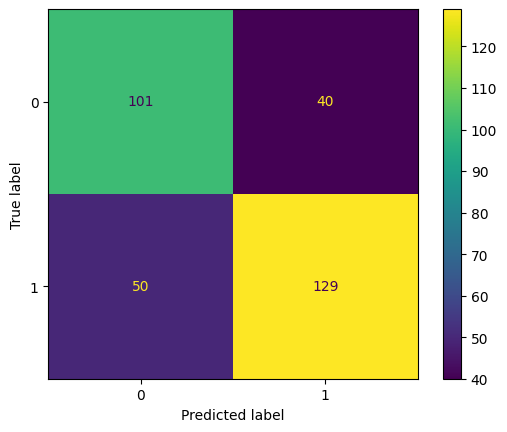

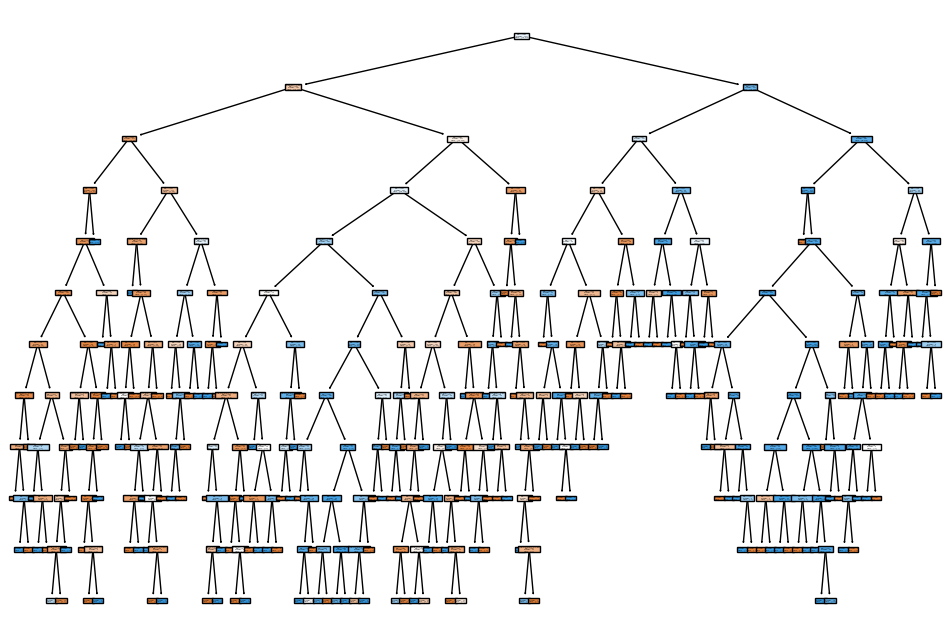

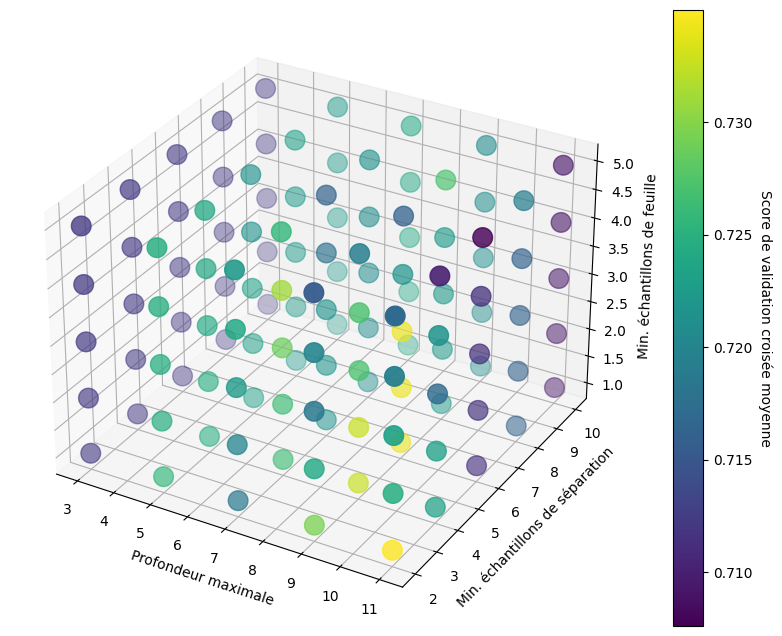

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix

# Définir la grille de paramètres de l'arbre de décision
param_grid = {'max_depth': [3, 5, 7, 9, 11],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

# Créer un objet classifieur arbre de décision
dt = DecisionTreeClassifier(random_state=42)

# Créer un objet GridSearchCV avec le classifieur arbre de décision et la grille de paramètres
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Adapter l'objet GridSearchCV aux données d'entraînement
dt_grid.fit(X_train_scaled, Y_train)

# Obtenir le meilleur classifieur arbre de décision à partir de l'objet GridSearchCV
best_dt = dt_grid.best_estimator_

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:")
print(dt_grid.best_params_)

# Évaluer le meilleur classifieur arbre de décision en utilisant les données de test
Y_pred_dt = best_dt.predict(X_test_scaled)
dt_report = classification_report(Y_test, Y_pred_dt)

# Afficher le rapport de classification du classifieur arbre de décision
print('Rapport du classifieur arbre de décision:')
print(dt_report)

# Afficher la matrice de confusion du classifieur arbre de décision
plot_confusion_matrix(best_dt, X_test_scaled, Y_test)

# Afficher l'arbre de décision avec les paramètres par défaut
plt.figure(figsize=(12,8))
plot_tree(best_dt, filled=True, feature_names=X.columns)
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Obtenir les résultats de la recherche en grille
results = dt_grid.cv_results_

# Extraire les scores de validation croisée moyens pour chaque combinaison de paramètres
mean_scores = results['mean_test_score']

# Create meshgrid arrays for the x, y, and z axes
max_depths, min_samples_splits, min_samples_leafs = np.meshgrid(
    param_grid['max_depth'],
    param_grid['min_samples_split'],
    param_grid['min_samples_leaf'],
    indexing='ij'
)

max_depths = max_depths.ravel()
min_samples_splits = min_samples_splits.ravel()
min_samples_leafs = min_samples_leafs.ravel()

# Create a 3D plot for the cross-validation scores
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(max_depths, min_samples_splits, min_samples_leafs, c=mean_scores, s=200, cmap='viridis', depthshade=True)

ax.set_xlabel('Profondeur maximale')
ax.set_ylabel('Min. échantillons de séparation')
ax.set_zlabel('Min. échantillons de feuille')

# Add a colorbar to the plot
cbar = plt.colorbar(sc, ax=ax)
cbar.ax.set_ylabel('Score de validation croisée moyenne', rotation=-90, va="bottom")

plt.show()


On a une distribution plus homogène que précédemment, ce qui va dan le sens de l'optimisation des résultats obtenus précédemment.
On va réutiliser les mêmes algorithmes que précédemment pour voir le gain (ou perte) en performance.

## Classification binaire SVM

Rapport de classification :
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       141
           1       0.80      0.77      0.78       179

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



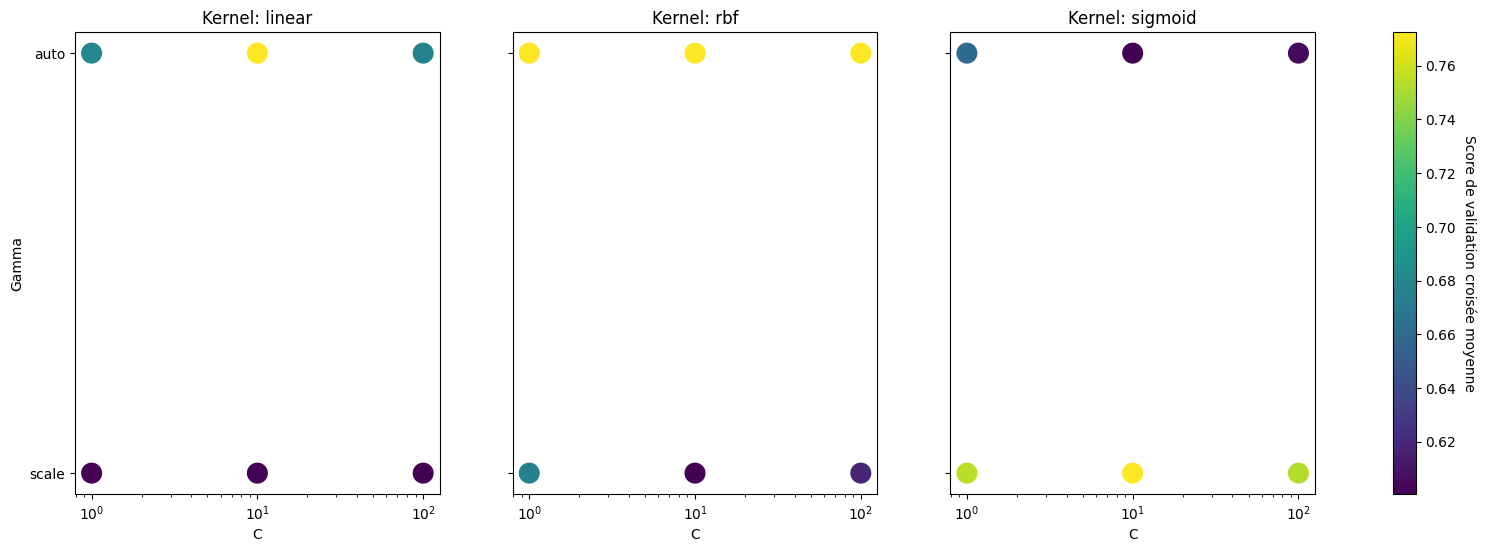

In [57]:
# Créer un objet SVC
svc = SVC()

# Définir la grille d'hyperparamètres
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

# Créer un objet GridSearchCV avec SVC et la grille d'hyperparamètres
grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)

# Entraîner le modèle sur les données d'entraînement standardisées
grid_search.fit(X_train_scaled, Y_train)

# Obtenir le meilleur modèle à partir de la recherche en grille
best_model = grid_search.best_estimator_

# Prédire les valeurs de qualité pour les données de test standardisées
Y_pred = best_model.predict(X_test_scaled)

# Calculer le rapport de classification des prédictions
report = classification_report(Y_test, Y_pred)

# Afficher le rapport de classification des prédictions
print('Rapport de classification :')
print(report)

# Obtenir les résultats de la recherche en grille
results = grid_search.cv_results_

# Extraire les scores de validation croisée moyens pour chaque combinaison de paramètres
mean_scores = results['mean_test_score']

# Create meshgrid arrays for the x, y, and z axes
Cs, kernels, gammas = np.meshgrid(
    param_grid['C'],
    param_grid['kernel'],
    param_grid['gamma'],
    indexing='ij'
)

Cs = Cs.ravel()
kernels = kernels.ravel()
gammas = gammas.ravel()

# Create 2D scatter plots for each kernel type
kernel_types = param_grid['kernel']

fig, axes = plt.subplots(1, len(kernel_types), figsize=(20, 6), sharey=True)

for i, kernel in enumerate(kernel_types):
    ax = axes[i]
    
    # Get indices where kernel type matches
    kernel_indices = np.where(kernels == kernel)

    # Plot scores for the current kernel type
    sc = ax.scatter(Cs[kernel_indices], gammas[kernel_indices], c=mean_scores[kernel_indices], s=200, cmap='viridis')

    ax.set_title(f'Kernel: {kernel}')
    ax.set_xlabel('C')
    ax.set_xscale('log')

    if i == 0:
        ax.set_ylabel('Gamma')

# Add a colorbar to the plot
cbar = plt.colorbar(sc, ax=axes.ravel().tolist())
cbar.ax.set_ylabel('Score de validation croisée moyenne', rotation=-90, va="bottom")

plt.show()



### Analyse:
Les nouveaux résultats sont nettement meilleurs que ceux obtenues dans la classification avec 6 classes avec une précision de 76%

## Classification binaire Random Forest

Meilleurs hyperparamètres:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Rapport de classification pour le pli 1:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       120
           1       0.83      0.84      0.83       136

    accuracy                           0.82       256
   macro avg       0.82      0.82      0.82       256
weighted avg       0.82      0.82      0.82       256

------------------------------------------------------------
Rapport de classification pour le pli 2:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       121
           1       0.83      0.84      0.84       135

    accuracy                           0.83       256
   macro avg       0.83      0.83      0.83       256
weighted avg       0.83      0.83      0.83       256

------------------------------------------------------------
Rapport de classification pou

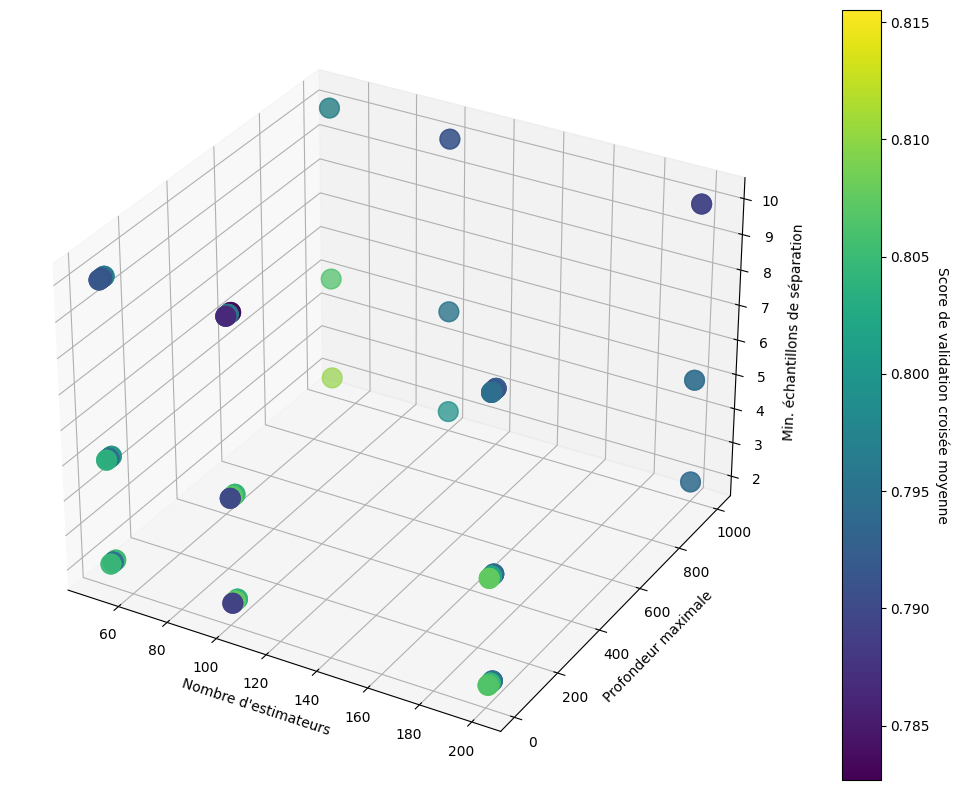

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

# Créer un objet RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Définir la grille des hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Créer un objet GridSearchCV avec RandomForestClassifier et la grille d'hyperparamètres
grid_search = GridSearchCV(rfc, param_grid, scoring='accuracy', cv=5)

# Entraîner le modèle sur les données d'entraînement standardisées
grid_search.fit(X_train_scaled, Y_train)

# Obtenir le meilleur modèle de la recherche par grille
best_model = grid_search.best_estimator_

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:")
print(grid_search.best_params_)

# Créer un objet StratifiedKFold avec 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser le compteur de pli
fold = 1

# Itérer à travers les plis Stratified K-fold
for train_index, test_index in skf.split(X_train_scaled, Y_train):
    # Séparer les données en ensembles d'entraînement et de validation pour le pli courant
    X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    Y_train_fold, Y_test_fold = Y_train.iloc[train_index], Y_train.iloc[test_index]

    # Entraîner le meilleur modèle sur les données d'entraînement actuelles du pli courant
    best_model.fit(X_train_fold, Y_train_fold)

    # Prédire les valeurs de qualité pour les données de validation actuelles du pli courant
    Y_pred_fold = best_model.predict(X_test_fold)

    # Calculer le rapport de classification pour le pli courant
    report = classification_report(Y_test_fold, Y_pred_fold)

    # Afficher le rapport de classification pour le pli courant
    print(f'Rapport de classification pour le pli {fold}:')
    print(report)
    print('-' * 60)

    # Incrémenter le compteur de pli
    fold += 1


# Obtenir les résultats de la recherche en grille
results = grid_search.cv_results_

# Extraire les scores de validation croisée moyens pour chaque combinaison de paramètres
mean_scores = results['mean_test_score']

# Create meshgrid arrays for the x, y, and z axes
n_estimators, max_depths, min_samples_splits, min_samples_leafs = np.meshgrid(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['min_samples_split'],
    param_grid['min_samples_leaf'],
    indexing='ij'
)

n_estimators = n_estimators.ravel()
max_depths = max_depths.ravel()
min_samples_splits = min_samples_splits.ravel()
min_samples_leafs = min_samples_leafs.ravel()

# Plot the 4D scatter plot for the cross-validation scores
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Replace None in max_depths with a large number for plotting purposes
max_depths_plot = np.where(max_depths == None, 999, max_depths)

sc = ax.scatter(n_estimators, max_depths_plot, min_samples_splits, c=mean_scores, s=200, cmap='viridis', depthshade=True)

ax.set_xlabel('Nombre d\'estimateurs')
ax.set_ylabel('Profondeur maximale')
ax.set_zlabel('Min. échantillons de séparation')

# Add a colorbar to the plot
cbar = plt.colorbar(sc, ax=ax)
cbar.ax.set_ylabel('Score de validation croisée moyenne', rotation=-90, va="bottom")

plt.show()

### Analyse & conclusions:
Les nouveaux résultats sont nettement meilleurs que ceux obtenues dans la classification avec 6 classes avec une précision de 80%
Globalement, le Random Forest donne les meilleurs résultats parmi les modèles testés
Cela s'explique d'abord par le caractère non linéaire de la relation entre les variables et la sortie mais également parce que Le Random Forest est un algorithme d'apprentissage supervisé qui combine plusieurs arbres de décision pour construire un modèle plus robuste et généralisable. Il s'agit d'une méthode d'ensemble qui prend en compte plusieurs échantillons aléatoires de données et plusieurs échantillons aléatoires de caractéristiques pour entraîner chaque arbre de décision.

## Neural network models:

In [42]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Charger le dataset
wine_dataset = pd.read_csv('winequality-red.csv', sep=';')

# Séparer les données en features et en target
X = wine_dataset.drop('quality', axis=1)
y = wine_dataset['quality']

# Encoder la variable target
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir l'architecture du modèle
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

# Compiler le modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print('Perte de test :', loss)
print('Précision de test :', accuracy)


Epoch 1/40
40/40 [==============================] - 1s 6ms/step - loss: 2.6245 - accuracy: 0.3683 - val_loss: 1.5519 - val_accuracy: 0.4812
Epoch 2/40
40/40 [==============================] - 0s 2ms/step - loss: 1.5919 - accuracy: 0.4238 - val_loss: 1.3274 - val_accuracy: 0.4469
Epoch 3/40
40/40 [==============================] - 0s 2ms/step - loss: 1.3050 - accuracy: 0.4504 - val_loss: 1.2141 - val_accuracy: 0.4844
Epoch 4/40
40/40 [==============================] - 0s 2ms/step - loss: 1.2150 - accuracy: 0.4746 - val_loss: 1.2017 - val_accuracy: 0.4906
Epoch 5/40
40/40 [==============================] - 0s 2ms/step - loss: 1.1925 - accuracy: 0.5004 - val_loss: 1.1450 - val_accuracy: 0.5094
Epoch 6/40
40/40 [==============================] - 0s 2ms/step - loss: 1.1561 - accuracy: 0.5004 - val_loss: 1.1702 - val_accuracy: 0.5000
Epoch 7/40
40/40 [==============================] - 0s 2ms/step - loss: 1.1506 - accuracy: 0.5074 - val_loss: 1.1681 - val_accuracy: 0.5094
Epoch 8/40
40/40 [==

In [43]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Charger le dataset
wine_dataset = pd.read_csv('winequality-red.csv', sep=';')

# Séparer les données en features et en target
X = wine_dataset.drop('quality', axis=1)
y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)

# Encoder la variable target
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir l'architecture du modèle
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test))

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print('Perte de test :', loss)
print('Précision de test :', accuracy)


Epoch 1/40
20/20 [==============================] - 1s 10ms/step - loss: 1.5916 - accuracy: 0.5465 - val_loss: 0.8232 - val_accuracy: 0.6406
Epoch 2/40
20/20 [==============================] - 0s 3ms/step - loss: 1.2139 - accuracy: 0.5622 - val_loss: 0.7787 - val_accuracy: 0.6281
Epoch 3/40
20/20 [==============================] - 0s 2ms/step - loss: 0.8672 - accuracy: 0.5864 - val_loss: 0.6994 - val_accuracy: 0.6281
Epoch 4/40
20/20 [==============================] - 0s 3ms/step - loss: 0.8039 - accuracy: 0.5770 - val_loss: 0.7143 - val_accuracy: 0.6219
Epoch 5/40
20/20 [==============================] - 0s 2ms/step - loss: 0.7307 - accuracy: 0.5887 - val_loss: 0.6478 - val_accuracy: 0.6219
Epoch 6/40
20/20 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5958 - val_loss: 0.6470 - val_accuracy: 0.6281
Epoch 7/40
20/20 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6028 - val_loss: 0.6392 - val_accuracy: 0.6313
Epoch 8/40
20/20 [=